# KMeans

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=316)
kmeans.fit(iris_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=316)

In [5]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [6]:
iris_df["target"] = iris.target
iris_df["cluster"] = kmeans.labels_   # 예측값
iris_result = iris_df.groupby(["target","cluster"])["sepal_length"].count()
print(iris_result)

target  cluster
0       0          50
1       1          48
        2           2
2       1          14
        2          36
Name: sepal_length, dtype: int64


## 군집화 평가

- 실루엣 분석
    - 각 군집 간 거리가 얼마나 효율적으로 분리되어 있는지

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

iris_df["silhouette"] = silhouette_samples(iris.data, iris_df["cluster"])

ave_score = silhouette_score(iris.data,iris_df["cluster"])
print("SAS:{0:.4f}".format(ave_score))

iris_df.groupby("cluster")["silhouette"].mean()

SAS:0.5528


cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette, dtype: float64

# GMM (Gaussian Mixture Model)

- 개별 정규분포의 평균과 분산 추정
- 각 데이터가 어떤 정규분포에 해당되는지에 대한 확률 추정

In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
gmm = GaussianMixture(n_components=3, random_state=316).fit(iris.data)
iris_df["gmm"] = gmm.predict(iris.data)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette,gmm
0,5.1,3.5,1.4,0.2,0,0,0.852955,1
1,4.9,3.0,1.4,0.2,0,0,0.815495,1
2,4.7,3.2,1.3,0.2,0,0,0.829315,1
3,4.6,3.1,1.5,0.2,0,0,0.805014,1
4,5.0,3.6,1.4,0.2,0,0,0.849302,1


In [10]:
iris_result = iris_df.groupby(["target"])["gmm"].value_counts()
print(iris_result)

target  gmm
0       1      50
1       0      45
        2       5
2       2      50
Name: count, dtype: int64


# SVM

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
x = iris.data[:, [0,2]]
y = iris.target

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [14]:
# 표준화(평균0, 표준편차 1) 
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit(x_train)

StandardScaler()

In [15]:
## 표준화 결과 numpy.ndarray 형식으로 출력
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [16]:
# x_train_std의평균과 표준편차
print('Mean of x_train_std:',np.mean(x_train_std[:,0]), np.mean(x_train_std[:,1]))
print('Stdof x_train_std:',np.std(x_train_std[:,0]), np.std(x_train_std[:,1]))

Mean of x_train_std: 1.541623971336646e-15 1.1207965772406342e-16
Stdof x_train_std: 1.0 1.0


In [17]:
# C가작은경우(오분류를관대하게허용)
# SVC 클래스에 kernel='linear', 시드넘버는1, C=0.1로 설정
from sklearn.svm import SVC
svm_smallc= SVC(kernel='linear', random_state=1, C=0.1)
svm_smallc.fit(x_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

- C: float, default=1.0
    - Regularization parameter. 
    - The strength of the regularization is inversely proportional to C. 
    - Must be strictly positive. 
    - The penalty is a squared l2 penalty.

- np 배열 결합

    - np.vstack: 세로로 결합
    - np.hstack: 가로로 결합

In [18]:
# 표준화된 것과 안된 것
x_combined_std= np.vstack((x_train_std, x_test_std))
y_combined= np.hstack((y_train, y_test))

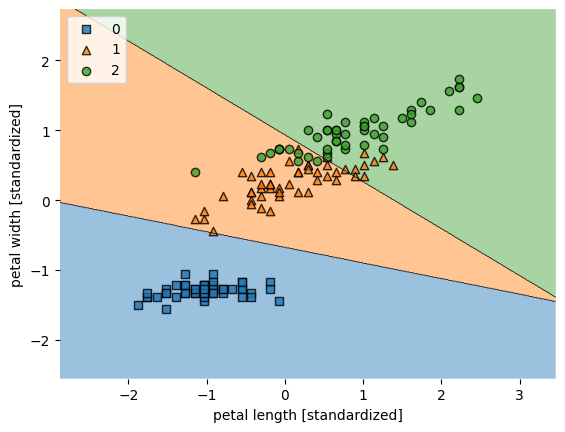

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_combined_std, y_combined, clf=svm_smallc)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [20]:
# 예측값과 관측값 비교
y_pred= svm_smallc.predict(x_test_std)
y_pred,(y_test!= y_pred)
print('Misclassified samples: %d' % (y_test!= y_pred).sum())

Misclassified samples: 10


In [21]:
# 정확도 계산
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.78


### c 다르게

In [22]:
# C가큰경우(오분류를엄격하게허용)
# SVC 클래스에kernel='linear', 시드넘버는1, C=10로 설정
svm_largec= SVC(kernel='linear', random_state=1, C=10)
svm_largec.fit(x_train_std, y_train)

SVC(C=10, kernel='linear', random_state=1)

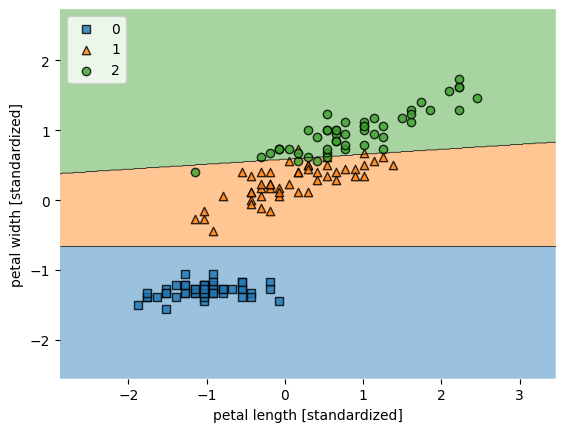

In [23]:
# 데이터와 결정경계그림
plot_decision_regions(x_combined_std, y_combined, clf=svm_largec)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [24]:
# 예측값과 관측값 비교
y_pred= svm_largec.predict(x_test_std)
y_pred,(y_test!= y_pred)

print('Misclassified samples: %d' % (y_test!= y_pred).sum())

Misclassified samples: 1


In [25]:
#정확도 계산
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


### Kernel SVM: gamma 값에 따른 결정경계면의 변화 (다항)
- gamma 작을 때: 1

- rbf 커널
    - 가우시안 커널
    - 차수가 무한대인 다항 커널
    - gamma: how far the influence of a single training example reaches

In [26]:
# SVC 클래스에kernel='rbf', 시드넘버는1, gamma=1로 설정
svm_k_smallg= SVC(kernel='rbf', random_state=1, gamma=1)
svm_k_smallg.fit(x_train_std, y_train)

SVC(gamma=1, random_state=1)

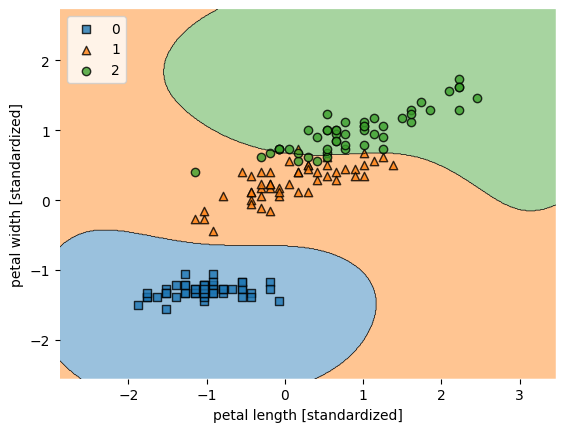

In [27]:
# 데이터와 결정경계그림
plot_decision_regions(x_combined_std, y_combined, clf=svm_k_smallg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [28]:
# 예측값과 관측값 비교
y_pred= svm_k_smallg.predict(x_test_std)
y_pred,(y_test!= y_pred)

print('Misclassified samples: %d' % (y_test!= y_pred).sum())

Misclassified samples: 4


In [29]:
# 정확도 계산
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


### gamma 클 때

In [30]:
# SVC 클래스에kernel='rbf', 시드넘버는1, gamma=100로 설정
svm_k_largeg= SVC(kernel='rbf', random_state=1, gamma=100)
svm_k_largeg.fit(x_train_std, y_train)

SVC(gamma=100, random_state=1)

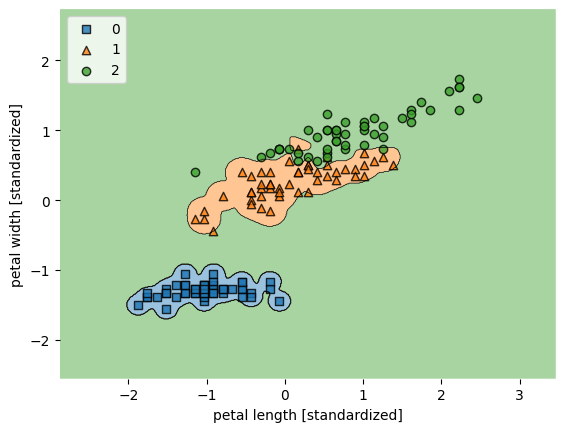

In [31]:
# 데이터와 결정경계그림
plot_decision_regions(x_combined_std, y_combined, clf=svm_k_largeg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [32]:
# 예측값과 관측값 비교
y_pred= svm_k_largeg.predict(x_test_std)
y_pred,(y_test!= y_pred)
print('Misclassified samples: %d' % (y_test!= y_pred).sum())

Misclassified samples: 2


In [33]:
# 정확도 계산
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


# Decision Tree

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)

In [35]:
import pydotplus
from IPython.display import Image
import graphviz

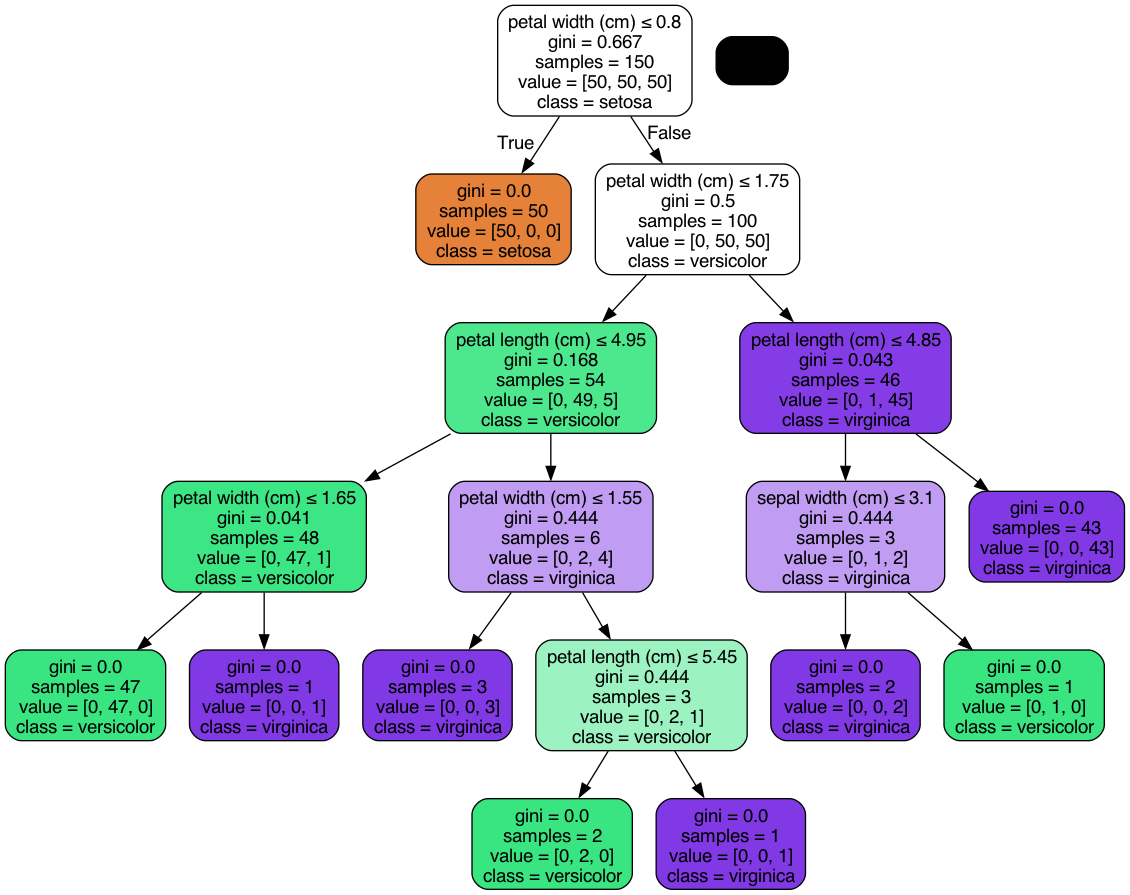

In [36]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Ensemble

In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [38]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=100)

## Bagging

- 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법
- random forest

In [39]:
m_bagging = BaggingClassifier()
m_bagging.fit(X_train,y_train)

BaggingClassifier()

In [40]:
pred_bagging = m_bagging.predict(X_test)
pred_bagging

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [41]:
y_test

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

### confusion matrix

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FosOZ5%2FbtrNSU44VrP%2FkzsadMPly11LZtGV5bJoQk%2Fimg.png)

<br>

- 정확도 = (TP + TN) / (TP + TN + EP + FN)
- 정밀도 = TP / (TP + FP)
- 재현율 = TP / (TP + FN)
- F1 = (2*정밀도*재현율) / (정밀도 + 재현율)

<br>

- sklearn
1) 정확도: metrics.accuracy_score()
2) 정밀도: metrics.precision_score()
3) 재현율: metrics.recall_score()
4) f1 점수: metrics.f1_score()

In [42]:
cf_bagging=confusion_matrix(y_test,pred_bagging)
print('Bagging Confusion Matrix')
print(cf_bagging)

Bagging Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [43]:
score_bagging=m_bagging.score(X_test, y_test)
print('Bagging Accuracy')
print(score_bagging)

Bagging Accuracy
0.9555555555555556


## Boosting
- 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법
- 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식

- bagging vs. boosting

배깅은 병렬로 학습하는 반면, 부스팅은 순차적으로 학습합니다. 한번 학습이 끝난 후 결과에 따라 가중치를 부여합니다. 그렇게 부여된 가중치가 다음 모델의 결과 예측에 영향을 줍니다.

오답에 대해서는 높은 가중치를 부여하고, 정답에 대해서는 낮은 가중치를 부여합니다. 따라서 오답을 정답으로 맞추기 위해 오답에 더 집중할 수 있게 되는 것입니다. 

부스팅은 배깅에 비해 error가 적습니다. 즉, 성능이 좋습니다. 하지만 속도가 느리고 오버 피팅이 될 가능성이 있습니다. 그렇다면 실제 사용할 때는 배깅과 부스팅 중 어떤 것을 선택해야 할까요? 상황에 따라 다르다고 할 수 있습니다. 개별 결정 트리의 낮은 성능이 문제라면 부스팅이 적합하고, 오버 피팅이 문제라면 배깅이 적합합니다.

In [44]:
m_boosting = GradientBoostingClassifier()
m_boosting.fit(X_train,y_train)

GradientBoostingClassifier()

In [45]:
pred_boosting = m_boosting.predict(X_test)
cf_boosting = confusion_matrix(y_test,pred_boosting)
print('Boosting Confusion Matrix')
print(cf_boosting)

Boosting Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [46]:
score_boosting = m_boosting.score(X_test, y_test)
print('Boosting Accuracy')
print(score_boosting)

Boosting Accuracy
0.9555555555555556


# Random Forest

- criterion = {“gini”, “entropy”, “log_loss”}, default=”gini”
- max_features= {“sqrt”, “log2”, None}, int or float, default=”sqrt”

<br>

- estimator_  :  DicisionTreeClassifier
- estimators_ : list of DecisionTreeClassifier
- feature_importances_ : ndarray of shape (n_features,)

In [47]:
m_RF = RandomForestClassifier(n_estimators=1000)
m_RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [48]:
pred_RF = m_RF.predict(X_test)
cf_RF = confusion_matrix(y_test,pred_RF)
print('Random Forest Confusion Matrix')
print(cf_RF)

Random Forest Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [49]:
score_RF = m_RF.score(X_test, y_test)
print('Random Forest Accuracy')
print(score_RF)

Random Forest Accuracy
0.9555555555555556


In [50]:
importances = m_RF.feature_importances_
importances

array([0.0896711 , 0.02977444, 0.4225362 , 0.45801825])

In [51]:
std = np.std([m_RF.feature_importances_ for tree in m_RF.estimators_], axis=0)

In [52]:
변수명 = [f"feature {i}" for i in range(iris.data.shape[1])]
변수명

['feature 0', 'feature 1', 'feature 2', 'feature 3']

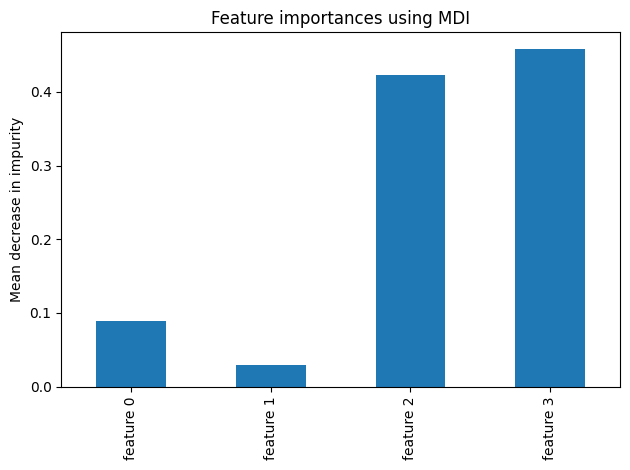

In [54]:
forest_importances = pd.Series(importances, index=변수명)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)  # yerr: 데이터의 편차를 나타내는 리스트 
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Tree_Ensemble

In [55]:
import numpy as np  # 선형대수, 행렬, 벡터
import pandas as pd  # CSV파일 읽기, DataFrame 객체, 평균, 중앙값, 분산, 표준편차, 사분위수, 상관관계
import matplotlib.pyplot as plt  # 박스플랏, 산점도
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [92]:
# hmeq data
hmeq = pd.read_csv('../data/hmeq.txt',sep='\t')
hmeq.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [93]:
hmeq.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [60]:
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [94]:
numeric = hmeq.select_dtypes(include=np.number)
numeric

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [95]:
numeric_col = numeric.columns.tolist()
numeric_col

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [96]:
hmeq[numeric_col] = hmeq[numeric_col].fillna(hmeq[numeric_col].median())

In [97]:
hmeq.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

In [98]:
hmeq[['REASON', 'JOB']] = hmeq[['REASON', 'JOB']].dropna()

In [99]:
hmeq.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     424
JOB        424
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

In [73]:
hmeq['REASON'] = hmeq['REASON'].astype('category')

In [70]:
hmeq['REASON'] = hmeq['REASON'].astype('category').cat.codes
hmeq[['REASON']]

,REASON
5,2
7,2
19,2
25,2
26,2
...,...
5955,1
5956,1
5957,1
5958,1


In [65]:
hmeq['REASON'].astype(float)

ValueError: Cannot cast object dtype to float64

In [57]:
hmeq = hmeq.drop(['REASON','JOB'], axis=1)   # 문자데이터
# 원래는 categorical 변수로 변경해야 함!

In [74]:
# 결측치 제거 혹은 채워넣기
#hmeq = hmeq.dropna()
hmeq = hmeq.fillna(hmeq.median())
#hmeq = hmeq.fillna(value=999)
hmeq.describe()

TypeError: could not convert string to float: 'Other'